# SHAP for 4-Week Model

Gaylen Fronk  
June 4, 2024

In [ ]:
study <- "match"
version <- "v6"
y_col_name <- "pp_hybrid_wk4_outcome"


In [ ]:

# packages for script
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:

# handle conflicts
options(conflicts.policy = "depends.ok")


In [ ]:
# absolute paths
switch (Sys.info()[['sysname']],
        # PC paths
        Windows = {
          path_data <- str_c("P:/studydata/match/chtc/", y_col_name)},
        
        # IOS paths
        Darwin = {
          path_data <- str_c("/Volumes/private/studydata/match/chtc/", y_col_name)},
        
        # Linux paths
        Linux = {
          path_data <- str_c("~/mnt/private/studydata/match/chtc/", y_col_name)}
)


In [ ]:
# chunk defaults

options(tibble.width = Inf)
options(tibble.print_max = Inf)


## Read in data

SHAP obtained with LOOCV at CHTC

In [ ]:
local <- read_csv(file.path(path_data, str_c("shap_loocv_", version), 
                            "output", "batch_results.csv"),
                  col_types = "cddd")

glimpse(local)


Rows: 1,272,852
Columns: 4
$ variable_name  <chr> "age_1st_cig", "age_daily_smoker", "age_ehr", "alc_bing…
$ variable_value <dbl> 0.18140, -0.56780, 0.57420, 0.70530, 1.41800, -0.02156,…
$ contribution   <dbl> 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,…
$ subid          <dbl> 51514, 51514, 51514, 51514, 51514, 51514, 51514, 51514,…

This dataset is already local SHAP values because we have one observation per subid per variable.

## Get global Shapley values

In [ ]:
global <- local |> 
  mutate(abs_contribution = abs(contribution)) |> 
  group_by(variable_name) |> 
  summarize(mean_contribution = mean(abs_contribution)) |> 
  arrange(desc(mean_contribution))

glimpse(global)


Rows: 1,173
Columns: 2
$ variable_name     <chr> "co", "race_ehr_white", "wisdm37_2_item_order", "mot…
$ mean_contribution <dbl> 0.029854168, 0.023656426, 0.018174897, 0.016328284, …

Delineate treatment interactions

In [ ]:
global <- global |> 
  mutate(tx_int = if_else(str_detect(variable_name, "treatment_"), "Interaction", "Main Effect"))


Add interpretable names

In [ ]:
global_tx <- global |> 
  filter(tx_int == "Interaction") |> 
  arrange(desc(mean_contribution)) |> 
  slice(1:25) |> 
  arrange(mean_contribution) |> 
  mutate(Feature = c(
    "C-NRT X Divorced",
    "C-NRT X Currently smokes menthol cigarettes",
    "Patch X Bothered by craving a cigarette (WSWS-2 Item `Crave`)",
    "Varenicline X Kept smoking despite relationship problems (DSM-5 Item 3)",
    "C-NRT X Married",
    "Varenicline X Does not live with another smoker",
    "Varenicline X Has never tried cigars",
    "C-NRT X Worries they are going crazy when they cannot keep their mind on a task (ASI-3 Item 2)",
    "C-NRT X Does not endorse withdrawal symptoms (DSM-5 Item 6)",
    "Patch X Has never tried cigars",
    "C-NRT X Identifies as White",
    "C-NRT X Most of their friends and acquaintances smoke (WISDM-37 Item 30)",
    "Varenicline X No close relative who smokes",
    "Patch X Has tried cigars but has never used regularly",
    "Varenicline X Does not think they do a lot in a day (MFI Item 6)",
    "Patch X No close friend who smokes",
    "Varenicline X Has a spouse/partner who does not smoke",
    "Varenicline X Greater income",
    "Varenicline X Worries they will choke to death when their throat feels tight (ASI-3 Item 15)",
    "C-NRT X Identifies as Black or African American",
    "C-NRT X Has never smoked menthol cigarettes",
    "Varenicline X Lives alone or only with a partner",
    "C-NRT X Disagrees that there is nothing worse than feeling distressed or upset (DTS Item 5)",
    "C-NRT X Sometimes feels like cigarattes are their best friends (WISDM-37 Item 22)",
    "C-NRT X Lives alone or only with a partner"
  )) |> 
  mutate(Feature = fct_inorder(Feature))

global <- global |> 
  arrange(desc(mean_contribution)) |> 
  slice(1:25) |> 
  arrange(mean_contribution) |> 
  mutate(Feature = c(
    "C-NRT X Identifies as Black or African American",
    "A lot of friends or family members smoke (WISDM-37 Item 27)",
    "C-NRT X Has never smoked menthol cigarettes",
    "Varenicline X Lives alone or only with a partner",
    "C-NRT X Disagrees that there is nothing worse than feeling distressed or upset (DTS Item 5)",
    "Does not dread having to do things (MFI Item 9)",
    "Endorses that the flavor of a cigarette is pleasing (WISDM-37 Item 5)",
    "More satisfied with their life as a whole",
    "Currently smokes menthol cigarettes",
    "Does not have a lot of plans (MFI Item 15)",
    "C-NRT X Sometimes feels like cigarattes are their best friends (WISDM-37 Item 22)",
    "Greater income",
    "More time around smokers on the weekend",
    "Won't do much to stop feeling distessed or upset (DTS Item 13)",
    "Identifies as Black or African American",
    "Enjoys being with their family or close friends (SHP Item 2)",
    "Worries they will choke to death when their throat feels tight (ASI-3 Item 15)",
    "C-NRT X Lives alone or only with a partner",
    "Bothered by wanting to smoke (WSWS-2 Item 'Want Cigarette')",
    "Greater duration of longest previous quit attempt",
    "Most of their friends and acquaintances smoke (WISDM-37 Item 30)",
    "Greater motivation to quit",
    "Endorses feeling cigarettes control them (WISDM-37 Item 2)",
    "Identifies as White",
    "Greater exhaled carbon monoxide"
  )) |> 
  mutate(Feature = fct_inorder(Feature))


## Make global figures

Overall

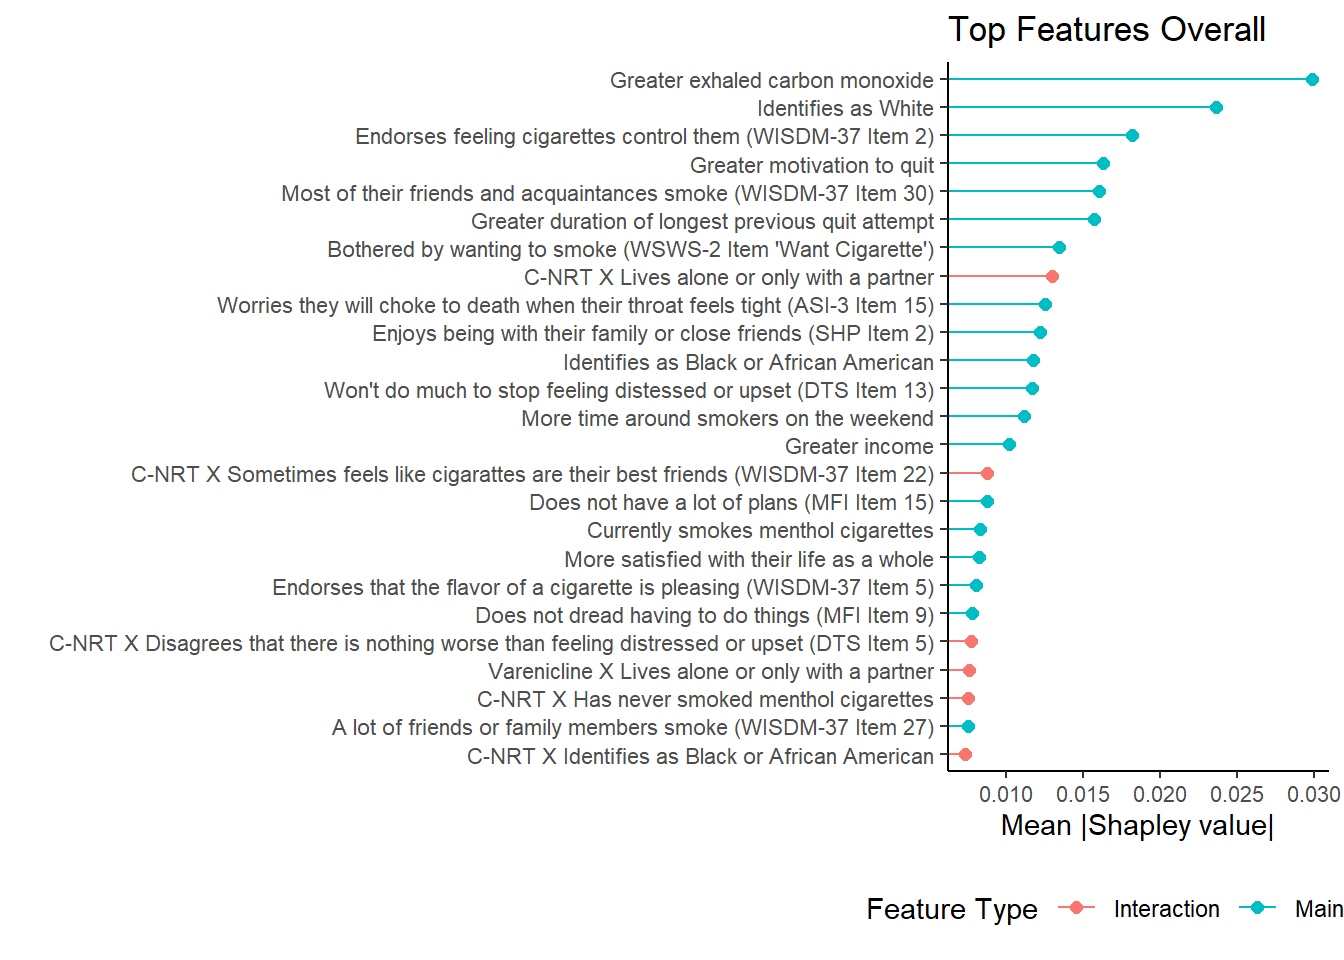

In [ ]:
fig_shap_global <- global |> 
  ggplot(mapping = aes(x = Feature, y = mean_contribution, color = tx_int)) +
  geom_point(size = 2) +
  geom_segment(aes(x = Feature, y = mean_contribution, xend = Feature),
               yend = 0) +
  labs(
    x = "",
    y = "Mean |Shapley value|",
    color = "Feature Type",
    title = "Top Features Overall"
  ) +
  coord_flip() +
  theme(legend.position = "bottom",
        axis.text = element_text(size = rel(0.75)),
        axis.title = element_text(size = rel(1)))

fig_shap_global


Global Shapley values among treatment interactions

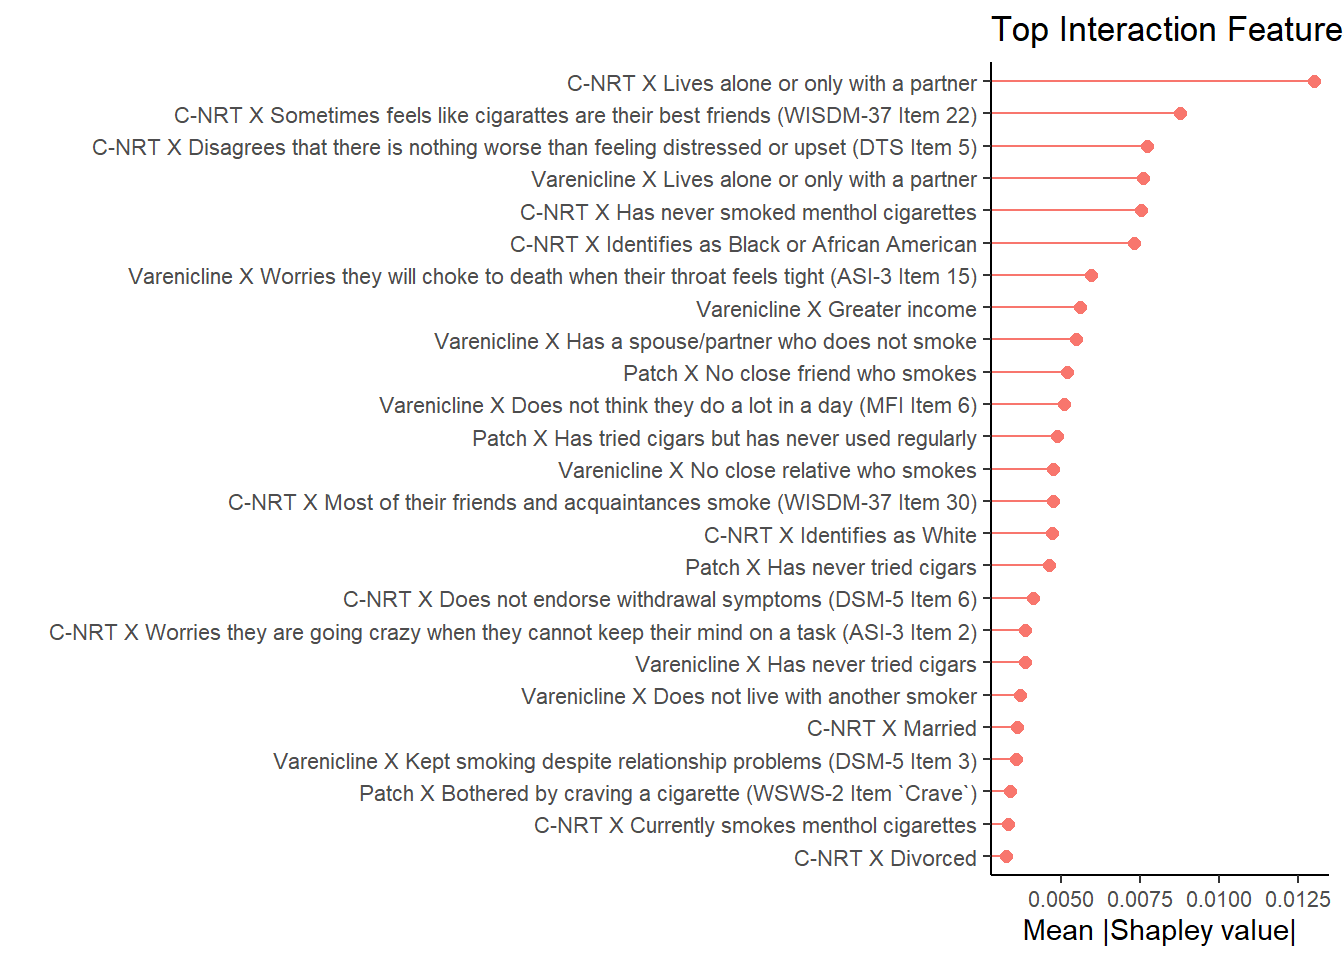

In [ ]:
fig_shap_global_tx <- global_tx |> 
  ggplot(mapping = aes(x = Feature, y = mean_contribution, color = tx_int)) +
  geom_point(size = 2) +
  geom_segment(aes(x = Feature, y = mean_contribution, xend = Feature),
               yend = 0) +
  labs(
    x = "",
    y = "Mean |Shapley value|",
    title = "Top Interaction Features"
  ) +
  coord_flip() +
  theme(legend.position = "none",
        axis.text = element_text(size = rel(0.75)),
        axis.title = element_text(size = rel(1)))

fig_shap_global_tx


Paneled Global figure

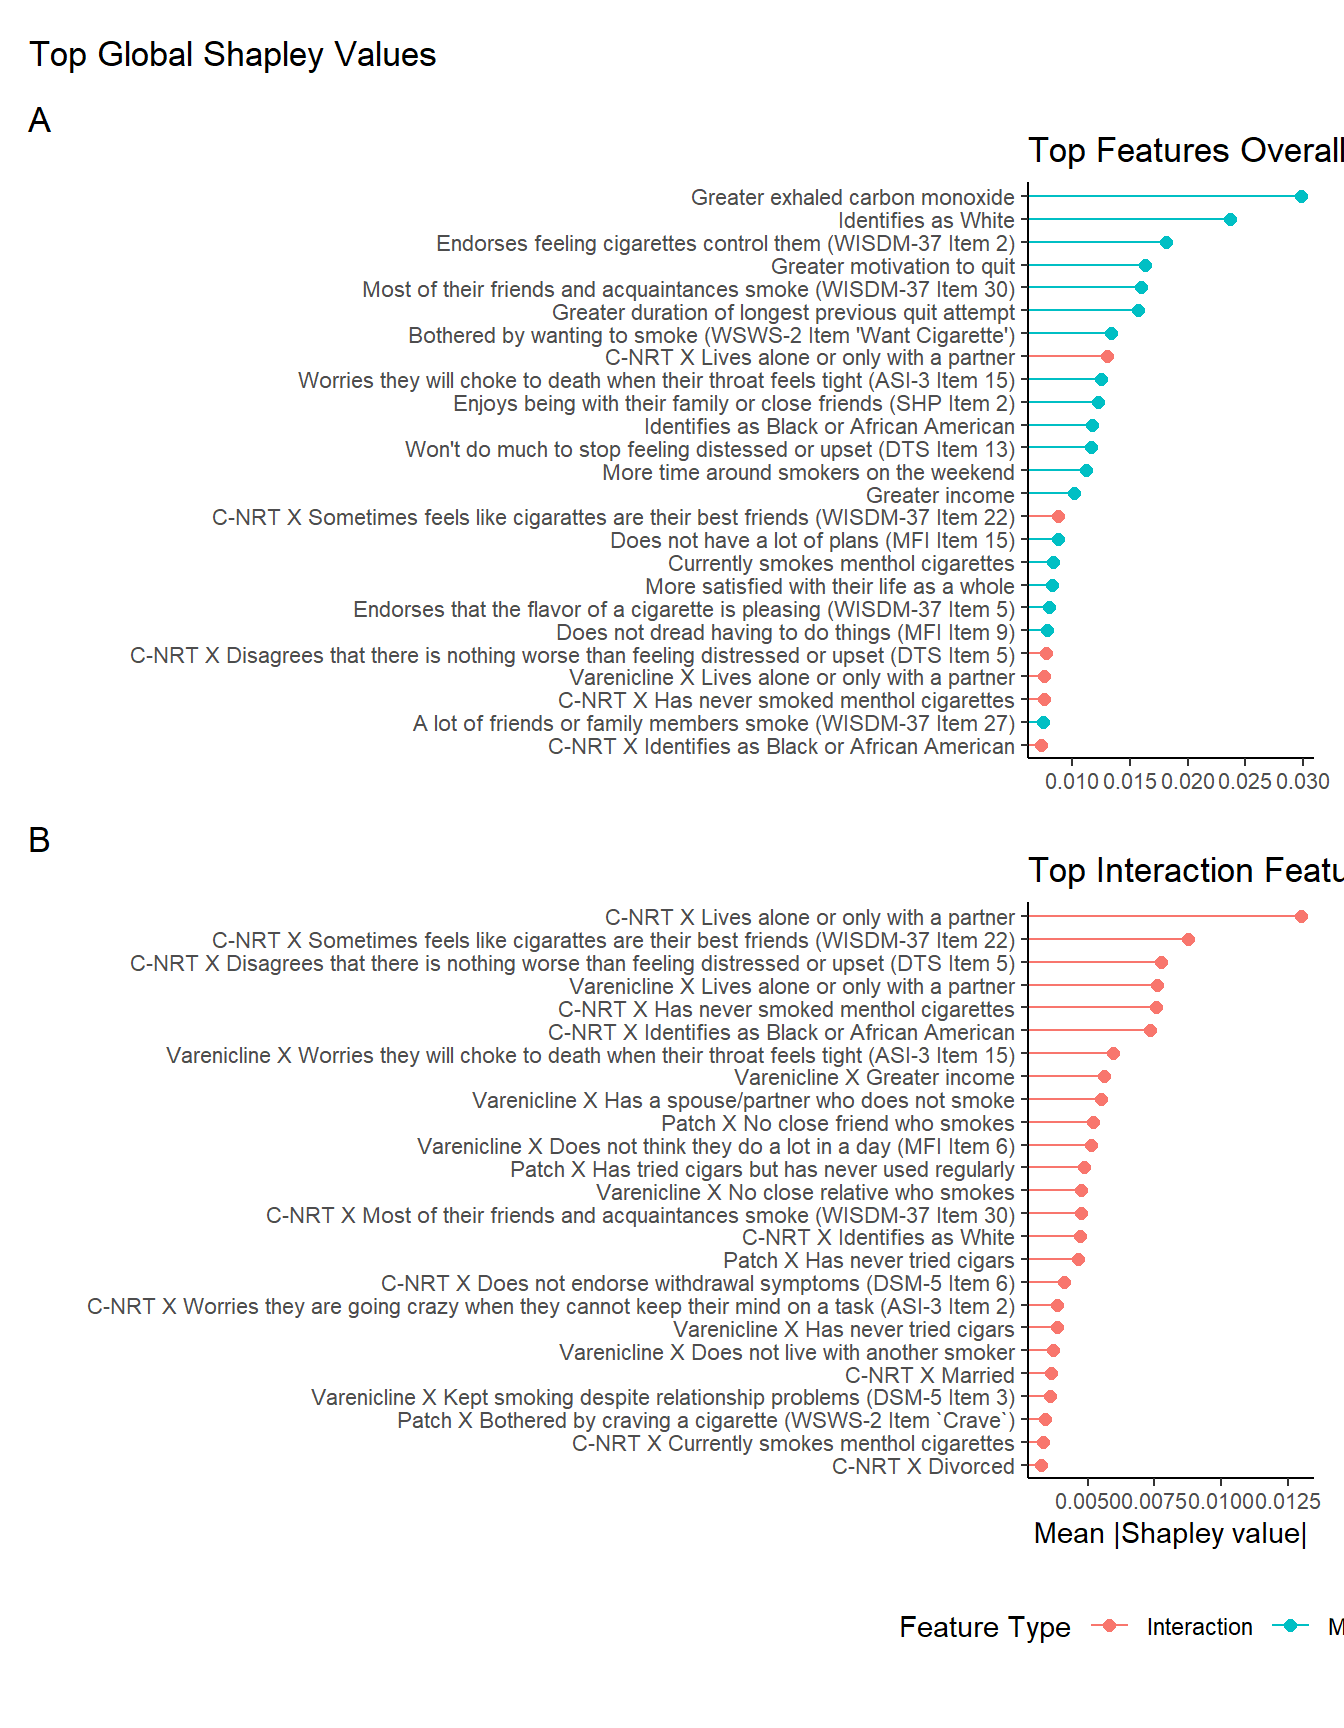

In [ ]:

fig_panel_shap_global <- (fig_shap_global / fig_shap_global_tx / guide_area()) +
  plot_layout(guides = "collect", axes = "collect", ncol = 1,
              heights = unit(c(3, 3, 0.5), "in")) +
  plot_annotation(tag_levels = "A",
                  title = "Top Global Shapley Values")

fig_panel_shap_global
